## predicting heart disease using machine learning



**thisk notebook looks into using various python based machine learning and data science
libraries in an attempt to build a machine learning model capable of predicting
whether or not someone has heart diseased based on the their medical attributes

we're going to take the following approaches

1.problem definition

2.Data

3.evaluation

4.features

5.Modelling

6.experimentation**

**1.problem definition

 given a clinical parameters about a patient ,can we predict whether or not they
    have heart disease?
    
    2. Data
    
    indicate where the data came from
    
    3. evaluation
    
    if we can reach 95% accuracy at predicting whether or not a patient has heart disease during
    the proof of concept ,we'll pursue the project
    
    4.features
    
    this is where you'll get differnt information about each of jthe features in your
    data,you do this via doing your own research

In [1]:
# regular exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

#models from sckit_learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



## load the data

In [2]:
df=pd.read_csv('6.1 heart-disease.csv.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## Data exploration(exploratory data analysis or EDA)

** the goal here is to find out more about the data and become a 
  
  subject matter expert on the dataset you are working with 
  
    what quesition are yoiu trying to solve
    
    what kind of data do we have and how do we treat different types
    
    whats missing from the data and how do you deal with it?
    
    where are the outliers and why should care about them?
    
    how can you add,change or remove features to get more out of your data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

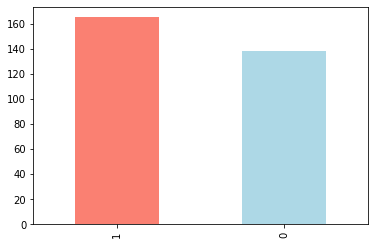

In [7]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


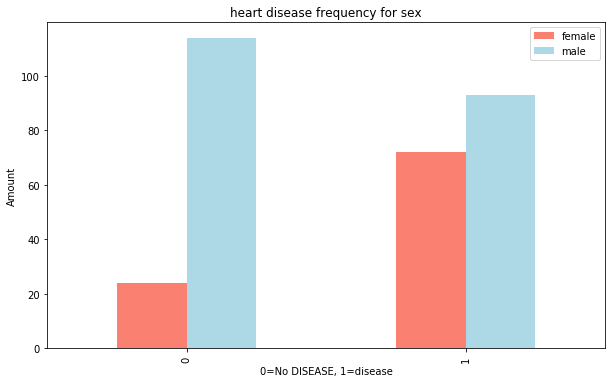

In [13]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10 , 6),
                                  color=['salmon','lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0=No DISEASE, 1=disease')
plt.ylabel('Amount')
plt.legend(['female','male']);

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## age vs max heart rate for heart disease

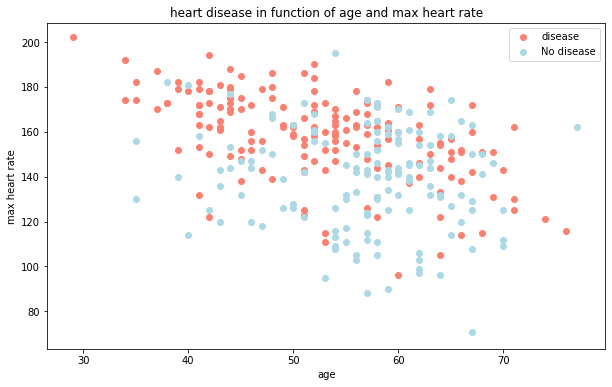

In [16]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],  
           df.thalach[df.target==1],
           c='salmon')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')
# add some helpful info
plt.title('heart disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['disease','No disease'])

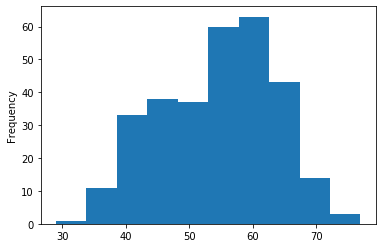

In [17]:
# check the distribution of the age column with a histogram
df.age.plot.hist()  

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


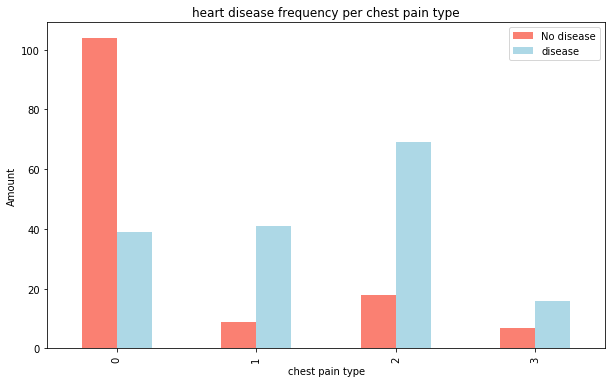

In [19]:
# make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                 color=['salmon','lightblue'])
# add some communication
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease', 'disease'])

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


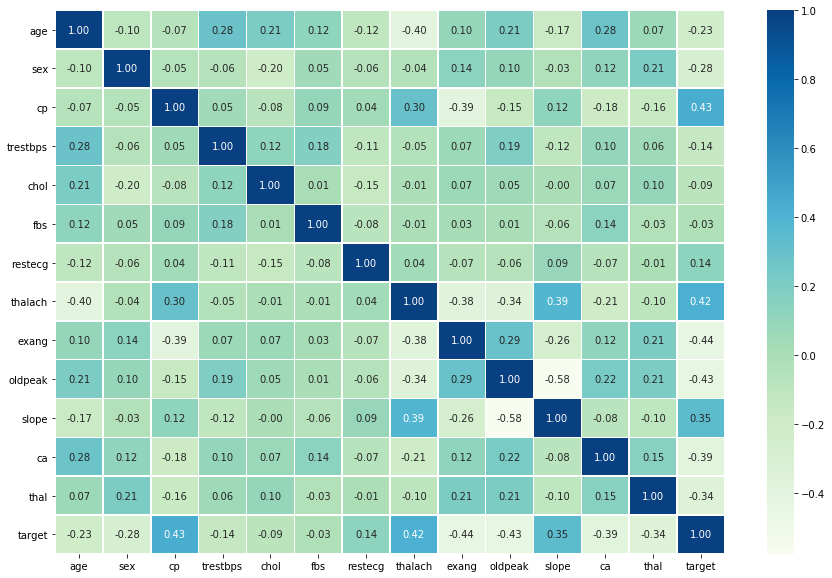

In [21]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,
              linewidth=0.5,
              fmt='.2f',
              cmap='GnBu')



In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
x=df.drop('target',axis=1)
y=df['target']

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y,len(y)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 303)

In [26]:
# split data into train and test sets
np.random.seed(42)

# split into train and test set

x_train,x_test, y_train, y_test=train_test_split(x,y,
                                                test_size=0.2)

In [27]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

** now we've got our data split into training and test sets,its

well train it (find the patterns) on the training set

and we'll test it (ust the patterns) on the test set**

## choosing the right models

** we're going to try 3 different machine learning models:

Logistic regression

K_Nearest Neighbours classifier

Random forest classifier

because we want to build 3 different models and because
we want to evaluate them and because we want to see a couple
of experience to see which one is the best we want to train them
on the training data and test them on the test data
we will set up a little dictionary with our models in it
and then we will create a function to fit and score our models**




In [82]:
models={'logistic regression':LogisticRegression 
       'KNN':KNeighborsClassifier(),
       "random forest":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores 
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores


D:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forest': 0.8360655737704918}

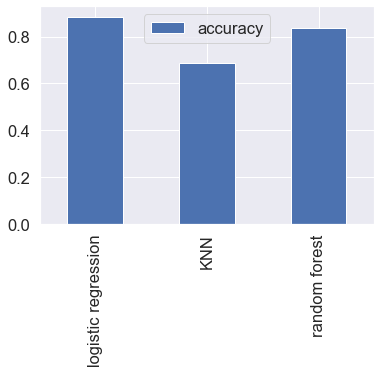

In [83]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

** lets look at the following:
    hyperarameter tuning 
    
    feature importance
    
    confusion matrix
    
    cross validation
    
    precision
    
    recall
    
    f1 score 
    
    classification report
    
    roc curve
    
    area under the curve
    
    **

## hyper parameter tuning


In [84]:
# lets tune KNN

# we want to compare different versions of the same model 

train_scores=[]
test_scores=[]                                                 
# create a list of different values for n_neighbours                 
neighbors=range(1,21)                                             


knn=KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(x_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # update the test scores list
    
    test_scores.append(knn.score(x_test,y_test))
    
    
    
    
 

In [87]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [88]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data: 75.41&


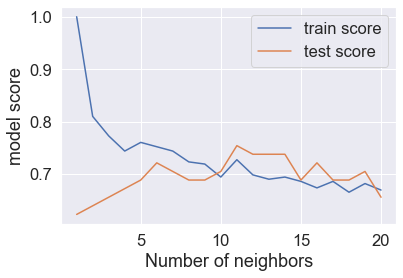

In [89]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xlabel('Number of neighbors')
plt.ylabel('model score')
plt.legend()
print(f'maximum KNN score on the test data: {max(test_scores)*100:.2f}&')

In [90]:
train_scores=[]
test_scores=[]

neighbours=range(1,21)
knn=KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    


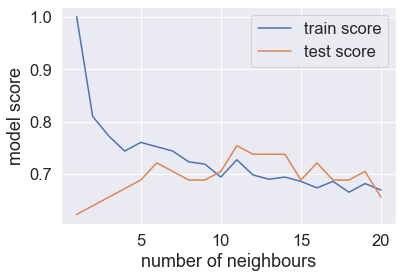

In [91]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xlabel('number of neighbours')
plt.ylabel('model score')
plt.legend()

## Hyperparameter tuning with Randomiedsearchcv

** we are going to tune logistic regression ,randomforestclassifier using
Randomizedsearchcv**

In [42]:
# create a hyperparameter grid for logistic regression

log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

# create a hyperparmeter grid for RandomForestclassifier

rf_grid={'n_estimators':np.arange(10,1000,50),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}


** now we have got hyperparameters grids setup for each of our models,lets
tune them using Randomizedsearchcv**

In [92]:
# tune logisticregression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# fit random hyperparameter search model for logisticregression

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+0

In [93]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [94]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

**now we have tuned logisticregression(),lets do the same for Randomforestclassifier()**

In [95]:
# setup random.seed
np.random.seed(42)

# setup random hyperparameter search for Randomforest classifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)


# fit random hyperparameter search model for Randomforestclassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [96]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [97]:
# evaluate the randomized search Randomforestclassifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with Gridsearchcv

In [98]:
# different hyperparameters for our logistic regression model
log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}

# setup grid hyperparameter search for logistic regression

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


 ## evaluating our tuned machine learning classifier,beyond accuracy

In [99]:
## Roc curve and Auc score
# confusion matrix
# classification report
# precision
# recall
# f1_score

In [100]:
# to make comparisons and evaluate our trained model first,we need to make predictions

In [101]:
# make predictions with tuned model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [102]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

** receiver operating charracteristic
A receiver operating characteristic curve or Roc curve is a graphical
plot that illustrates the diagnostic ability of a binary classifier system
as its discrimination threshold is varied.The ROC curve is created by plotting
the true positive rate against the false positive rate at various threshold**

In [103]:
# true positive=model predicts 1 when truth is 1
# false positive=model predicts 1 when truth is 0
# True negative =model predicts 0 when truth is 0
# false negative= model predicts 0 when truth is 1

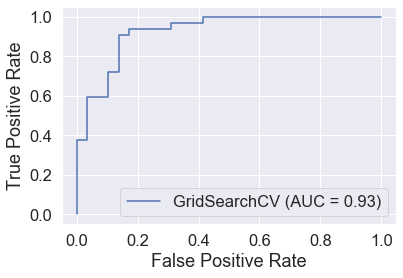

In [104]:
from sklearn.metrics import plot_roc_curve
# plot Roc curve and calculate AUC metrics
plot_roc_curve(gs_log_reg,x_test,y_test)


In [105]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


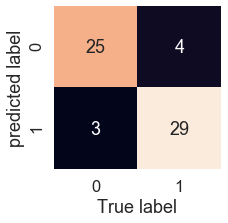

In [106]:
# to make it more visible,we will use heatmap
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking a confusion matrix using seaborn's heatmap()
    
    """
    fig,ax=plt.subplots(figsize=(3, 3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')
    
plot_conf_mat(y_test,y_preds)
    
    
    

**Now we have got a ROC curve,an AUC metric and a confusion matrix,lets get a 
classification report as well as cross validated precision ,recall and f1_score**

**precision,recall and F1 use positives and negatives to measure
a model's accuracy when making predictions**


** lets say your classification model predicts apples and bananas
if your model avoids alot of mistake in predicting bananas and apples
then your model has a high precision**

In [107]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




## calculate evaluation metrics using cross_validation

**we are going to calculate precision,recall and f1 score of our model using cross_validation
and to do so we'll be using cross_val_score()**

In [108]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [111]:
# create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver='liblinear')


In [112]:
# cross validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [113]:
# cross_validated precision
cv_precision=cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [114]:
# cross validated f1_score
cv_recall=cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [116]:
# cross validated f1_score
cv_f1=cross_val_score(clf,
                     x,
                     y,
                     cv=5,
                     scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

## Feature importance

** feature importance is another as asking, 'which features contributed most to the 
outcome of the model and how did they contribute?
finding feature importance is different for each machine learning model**

In [117]:
# lets find the feature importance for our logisticregression model

# fit and instance of logistic regression
clf=LogisticRegression(C= 0.20433597178569418,
                      solver= 'liblinear')
                       
clf.fit(x_train,y_train);

In [118]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [119]:
# match coef's of features to columns
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

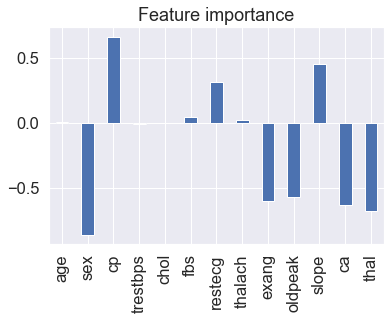

In [80]:
# visualize feature importance 
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance',legend=False);

## Review the project

## Experimentation

In [ ]:
** if you havent hit your evaluation metric yet ask yourself....

* could you collect more data?

* couldd you try a better model? like catboost or XGboost?

* could you improve the current models? (beyond what we've done so far)
   
* if your model is good enough (you have hit your evaluation metric)
 how would you export it and share it with others                                        